In [1]:
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#%matplotlib notebook
from multiprocessing import Pool
from tqdm import tqdm
import time
#from pandarallel import pandarallel
model = load_model('i_predict CD_OA2')

In [20]:
df1_std = pd.read_csv('CD_OA_std', usecols=[1,2,3,4,6])
df1_std

,V_cell,P_b,T_cell,stoichi_anode,W_ch
0,1.603567,-1.224725,-1.224745,-1.224745,-1.069045
1,1.336306,-1.224725,-1.224745,-1.224745,-1.069045
2,1.069045,-1.224725,-1.224745,-1.224745,-1.069045
3,0.801784,-1.224725,-1.224745,-1.224745,-1.069045
4,0.534522,-1.224725,-1.224745,-1.224745,-1.069045
...,...,...,...,...,...
1048,-0.534522,-1.224725,1.224745,1.224745,1.336306
1049,-0.801784,-1.224725,1.224745,1.224745,1.336306
1050,-1.069045,-1.224725,1.224745,1.224745,1.336306
1051,-1.336306,-1.224725,1.224745,1.224745,1.336306


In [5]:
df1 = pd.read_csv('CD_OA', usecols=[1,2,3,4,6,8])
df1

,V_cell,P_b,T_cell,stoichi_anode,W_ch,i_ave
0,1.00,101330.0,373.15,1.5,0.4,10.380173
1,0.95,101330.0,373.15,1.5,0.4,44.930790
2,0.90,101330.0,373.15,1.5,0.4,159.315484
3,0.85,101330.0,373.15,1.5,0.4,413.519446
4,0.80,101330.0,373.15,1.5,0.4,819.621538
...,...,...,...,...,...,...
1048,0.60,101330.0,393.15,5.5,1.6,5128.186268
1049,0.55,101330.0,393.15,5.5,1.6,6178.536866
1050,0.50,101330.0,393.15,5.5,1.6,7269.896160
1051,0.45,101330.0,393.15,5.5,1.6,8393.221496


In [18]:
df_i = pd.read_csv('CD_OA', usecols=[8])

In [21]:
df_i_Pre = model.predict(df1_std)
df_i_Pre

33/33 [==============================] - 0s 3ms/step


array([[  10.248358],
       [  49.383415],
       [ 159.8648  ],
       ...,
       [7309.6333  ],
       [8444.527   ],
       [9579.422   ]], dtype=float32)

In [26]:
def Vstd(V):
 #説明変数Vの平均と標準偏差を出し、求めたいVの値を標準化する。
 global df1
 df_V = pd.DataFrame([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9])
 V_std = (V-df1["V_cell"].mean())/df1["V_cell"].std()
 return(V_std)

def Pstd(P):
  #説明変数Tの平均と標準偏差を出し、求めたいPの値を標準化する。
 global df1
 df_P = pd.DataFrame([101330.0,202660.0,3093990.0])
 P_std = (P-df1["P_b"].mean())/df1["P_b"].std()
 return(P_std) 

def Tstd(T):
  #説明変数Tの平均と標準偏差を出し、求めたいTの値を標準化する。
 global df1
 df_T = pd.DataFrame([373.15,383.15,393.15])
 T_std = (T-df1["T_cell"].mean())/df1["T_cell"].std()
 return(T_std) 

def Etastd(eta):
  #説明変数Tの平均と標準偏差を出し、求めたいTの値を標準化する。
 global df1
 df_Eta = pd.DataFrame([373.15,383.15,393.15])
 Eta_std = (eta-df1["stoichi_anode"].mean())/df1["stoichi_anode"].std()
 return(Eta_std) 

def W_chstd(W_ch):
 #説明変数Wの平均と標準偏差を出し、求めたいWの値を標準化する。
 global df1
 df_W = pd.DataFrame([0.4,0.8,1.6])
 W_std = (W_ch-df1["W_ch"].mean())/df1["W_ch"].std()
 return(W_std)

In [28]:
def I_ave_pre(P,T,Eta,W):
 dfPRE = pd.DataFrame(columns=['V_cell','i_ave'])
 
 global df1, df1_std
 df3_std = pd.DataFrame({'P_b':[Pstd(P)],'T_cell':[Tstd(T)],'stoichi_acnode':[Etastd(Eta)],'W_ch':[W_chstd(W)]})
 for V in np.linspace(0.4,1,100):   #Vの連続値に対応した電流密度を出す
    df5_std = pd.DataFrame({'V[V]':[Vstd(V)]})
    df6_std = pd.concat([df5_std,df3_std], axis=1)
    i_ave_pre = model.predict(df6_std)    #モデルで予測
    new_row = {'V_cell':V,'i_ave':i_ave_pre}
    dfPRE = pd.concat([dfPRE, pd.DataFrame([new_row])], ignore_index=True) #データフレームとして予測値を出力
 
 return dfPRE

1/1 [==============================] - ETA: 0s

C:\Users\aruhy\AppData\Local\Temp\ipykernel_11992\975818935.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfPRE = pd.concat([dfPRE, pd.DataFrame([new_row])], ignore_index=True) #データフレームとして予測値を出力


1/1 [==============================] - 0s 50ms/step


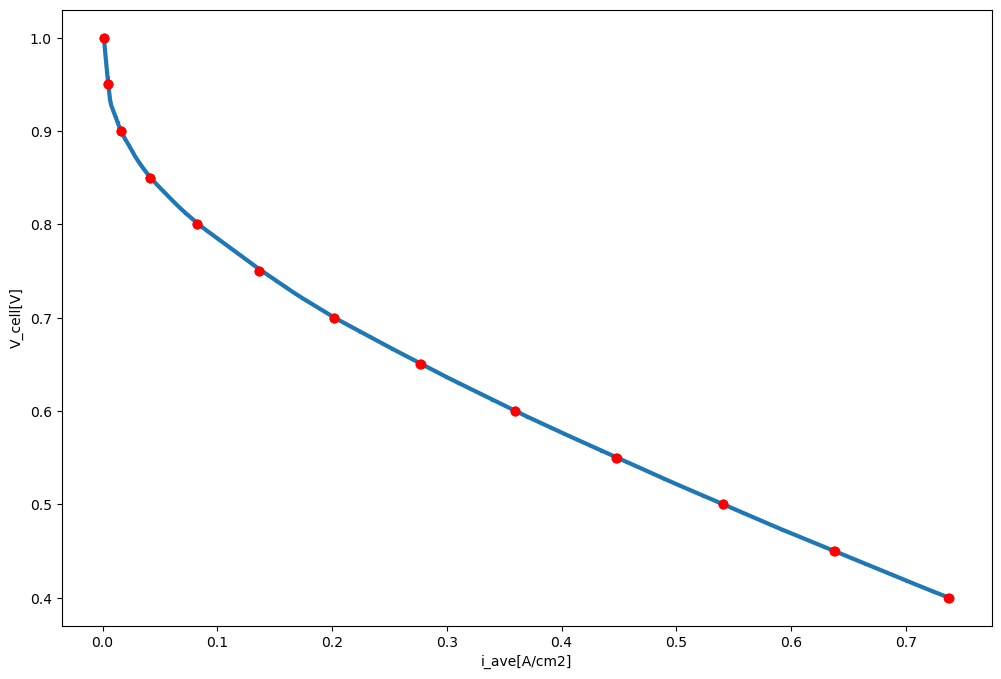

In [40]:
#予測結果の電流密度の平均表示
dfPRE =I_ave_pre(101330.0,373.15,1.5,0.4)
figPRE = plt.figure(figsize=(12, 8))
axPRE = figPRE.add_subplot(111)

#CONSOL結果の表示
dfCOM0 = df1[(df1['P_b']==101330.0) & (df1['T_cell']==373.15) & (df1['stoichi_anode']==1.5) &  (df1['W_ch']==0.4)]
scCOM0 = axPRE.scatter(dfCOM0['i_ave']*1e-4,dfCOM0['V_cell'],color='red')

scPRE = axPRE.scatter(dfPRE['i_ave']*1e-4,dfPRE['V_cell'],s=2,zorder=0)
axPRE.plot(dfPRE['i_ave']*1e-4, dfPRE['V_cell'], linestyle='-', linewidth=3, zorder=0) 

# 軸ラベルを追加
plt.xlabel('i_ave[A/cm2]')
plt.ylabel('V_cell[V]')
plt.show()